In [44]:
import tensorflow as tf
# Load MNist dataSet 
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print (y_train.shape)

(60000, 28, 28)
(60000,)


In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [46]:
x_train.shape

(60000, 28, 28)

In [47]:
single_image = x_train[0]

In [48]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [49]:
single_image.shape

(28, 28)

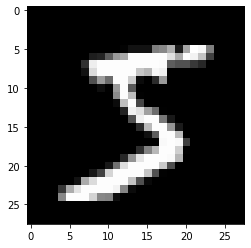

In [50]:
plt.imshow(single_image, cmap='gray')

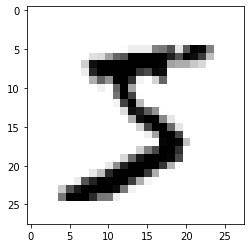

In [51]:
plt.imshow(single_image, cmap=plt.cm.binary)

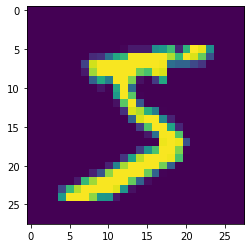

In [52]:
plt.imshow(single_image)

In [53]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [54]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [55]:
from keras.utils.np_utils import to_categorical

In [56]:
y_train.shape

(60000,)

In [57]:
y_example = to_categorical(y_train)

In [58]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [59]:
y_example.shape

(60000, 10)

In [60]:
y_example[0] # num 5 

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [61]:
y_cat_test = to_categorical(y_test,10)

In [62]:
y_cat_train = to_categorical(y_train,10)

In [63]:
single_image.max()

255

In [64]:
single_image.min()

0

In [65]:
x_train = x_train/255 # single_image.max()
x_test = x_test/255

In [66]:
scaled_single = x_train[0]

In [67]:
scaled_single.max()

1.0

In [68]:
x_train.shape

(60000, 28, 28)

In [69]:
x_test.shape

(10000, 28, 28)

In [70]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [71]:
x_train.shape

(60000, 28, 28, 1)

In [72]:
x_test = x_test.reshape(10000,28,28,1)

In [73]:
x_test.shape

(10000, 28, 28, 1)

In [74]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [75]:
model = Sequential()

# CONVOLUTIONAL LAYER
#Typically the kernel size is a three by three or four by four and filters.
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.fit(x_train,y_cat_train,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1396 - accuracy: 0.9570
Epoch 2/2
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0493 - accuracy: 0.9850


In [78]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0435 - accuracy: 0.9869


[0.04354425519704819, 0.9868999719619751]

In [79]:
from sklearn.metrics import classification_report

In [80]:
predictions =model.predict(x_test)

In [81]:
y_cat_test.shape

(10000, 10)

In [82]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [83]:
predictions[0]

array([3.6474329e-08, 2.3550943e-08, 1.0493489e-05, 3.2648238e-06,
       1.3980078e-09, 6.8219710e-09, 9.6137692e-13, 9.9997175e-01,
       4.8099332e-07, 1.4063000e-05], dtype=float32)

In [84]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [86]:
model.save('epic_num_reader.model')

2022-04-04 14:33:05.483776: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [87]:
new_model=tf.keras.models.load_model('epic_num_reader.model')

In [88]:
predictions=new_model.predict([x_test])

In [89]:
print(predictions)

[[3.6474329e-08 2.3550943e-08 1.0493489e-05 ... 9.9997175e-01
  4.8099332e-07 1.4063000e-05]
 [4.1957722e-07 8.4677195e-05 9.9991024e-01 ... 2.9926278e-10
  1.0576597e-06 5.6978068e-12]
 [4.7343769e-07 9.9978191e-01 7.3290098e-06 ... 1.7443930e-05
  2.1347612e-05 3.9478095e-07]
 ...
 [8.0906637e-10 1.9284869e-06 7.8326865e-09 ... 5.7599359e-06
  8.4094154e-06 6.5032364e-05]
 [1.0661712e-08 1.6203675e-08 4.1845677e-10 ... 4.4877679e-10
  4.1123116e-05 1.9286066e-08]
 [1.7859544e-07 3.9481545e-08 4.9575885e-07 ... 6.5702922e-11
  6.0635927e-08 1.1956142e-09]]


In [90]:
print(np.argmax(predictions[0]))

7


<function matplotlib.pyplot.show(close=None, block=None)>

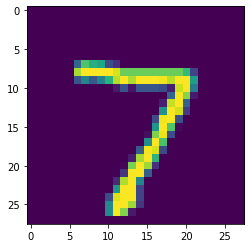

In [93]:
plt.imshow(x_test[0])
plt.show